In [ ]:
file_id = '1LkYIcVixAeWsYqeoQSdx0aDhaDRMioLd'
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
!wget -O data.zip --no-check-certificate "$file_download_link"
!unzip data.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Colab Notebooks'

# ECS 171 Final Project

Group 26 (Jun Ha (Andy) Lee, Erick S. Arenas, Soumyajit (Sam) Chatterjee, Joyjit (Joy) Chatterjee

## Data Exploration

Loading Our Data and Finding Dimensions

In [1]:
import pandas as pd

data = pd.read_csv(drive_path+'/data/hotel_booking.csv')
print("# of Observations:", data.shape[0])
print("# of Columns:", data.shape[1])
data.head(10)

# of Observations: 119390
# of Columns: 36


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


From the data documentation, four columns—'name', 'email', 'phone-number', and 'credit_card'— have been artificaially created. Therefore, we would like to drop these four columns.

In [2]:
data = data.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1)
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


List of columns in our datasets are:

In [3]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

From these columns, we decided to drop the following columns:
*   'country' - We believe that the dataset is insufficient to make assumptions on country-wide scale
*   'agent' - This column represents the ID of the travel agency which the name was omitted due to anonymity reasons. Therefore, it was not possible to deciphyer with 14% of the data is missing
*   'company' - Similar reasons as above with 94% of the data missing
*   'reservation_status_date' - This column represents the "date at which the last status was set." We believe this data is only significant for analysis of individual(small) data sets due to varying circumstances.



In [4]:
data = data.drop(['country', 'agent', 'company', 'reservation_status_date'], axis = 1)
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

From these columns, we would like to analyze all of the categorical variables.

In [5]:
catcols = ['hotel', 'is_canceled', 'arrival_date_month', 'meal',
           'market_segment', 'distribution_channel', 'is_repeated_guest',
           'reserved_room_type', 'assigned_room_type', 'deposit_type',
           'customer_type', 'reservation_status']
for col in catcols:
  print(col, data[col].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
distribution_channel ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
is_repeated_guest [0 1]
reserved_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
deposit_type ['No Deposit' 'Refundable' 'Non Refund']
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group']
reservation_status ['Check-Out' 'Canceled' 'No-Show']


From the categorical variables, we are not able to understand the code of room types for "reserved_room_type" and "assigned_room_type". Therefore, we would like to create a column to replace the two by returning a True value when "reserved_room_type" and "assigned_room_type" match and False when there is a mismatch.

In [6]:
data['success_room_type'] = data.apply(lambda row: row.reserved_room_type == row.assigned_room_type, axis=1)
data[['reserved_room_type', 'assigned_room_type', 'success_room_type']].head(5)

,reserved_room_type,assigned_room_type,success_room_type
0,C,C,True
1,C,C,True
2,A,C,False
3,A,A,True
4,A,A,True


Consequently, we will drop 'reserved_room_type' and 'assigned_room_type' as it is not possible to deciphyer the code as the name was omitted due to anonymity reasons.

In [7]:
catcols.append('success_room_type')
catcols.remove('reserved_room_type')
catcols.remove('assigned_room_type')
data = data.drop(['reserved_room_type', 'assigned_room_type'], axis = 1)

For the numerical columns(non-categorical columns), we will generate a pariplot to explore the distribution of the data

In [8]:
numcols = []
for cols in data.columns:
  if cols not in catcols:
    numcols.append(cols)

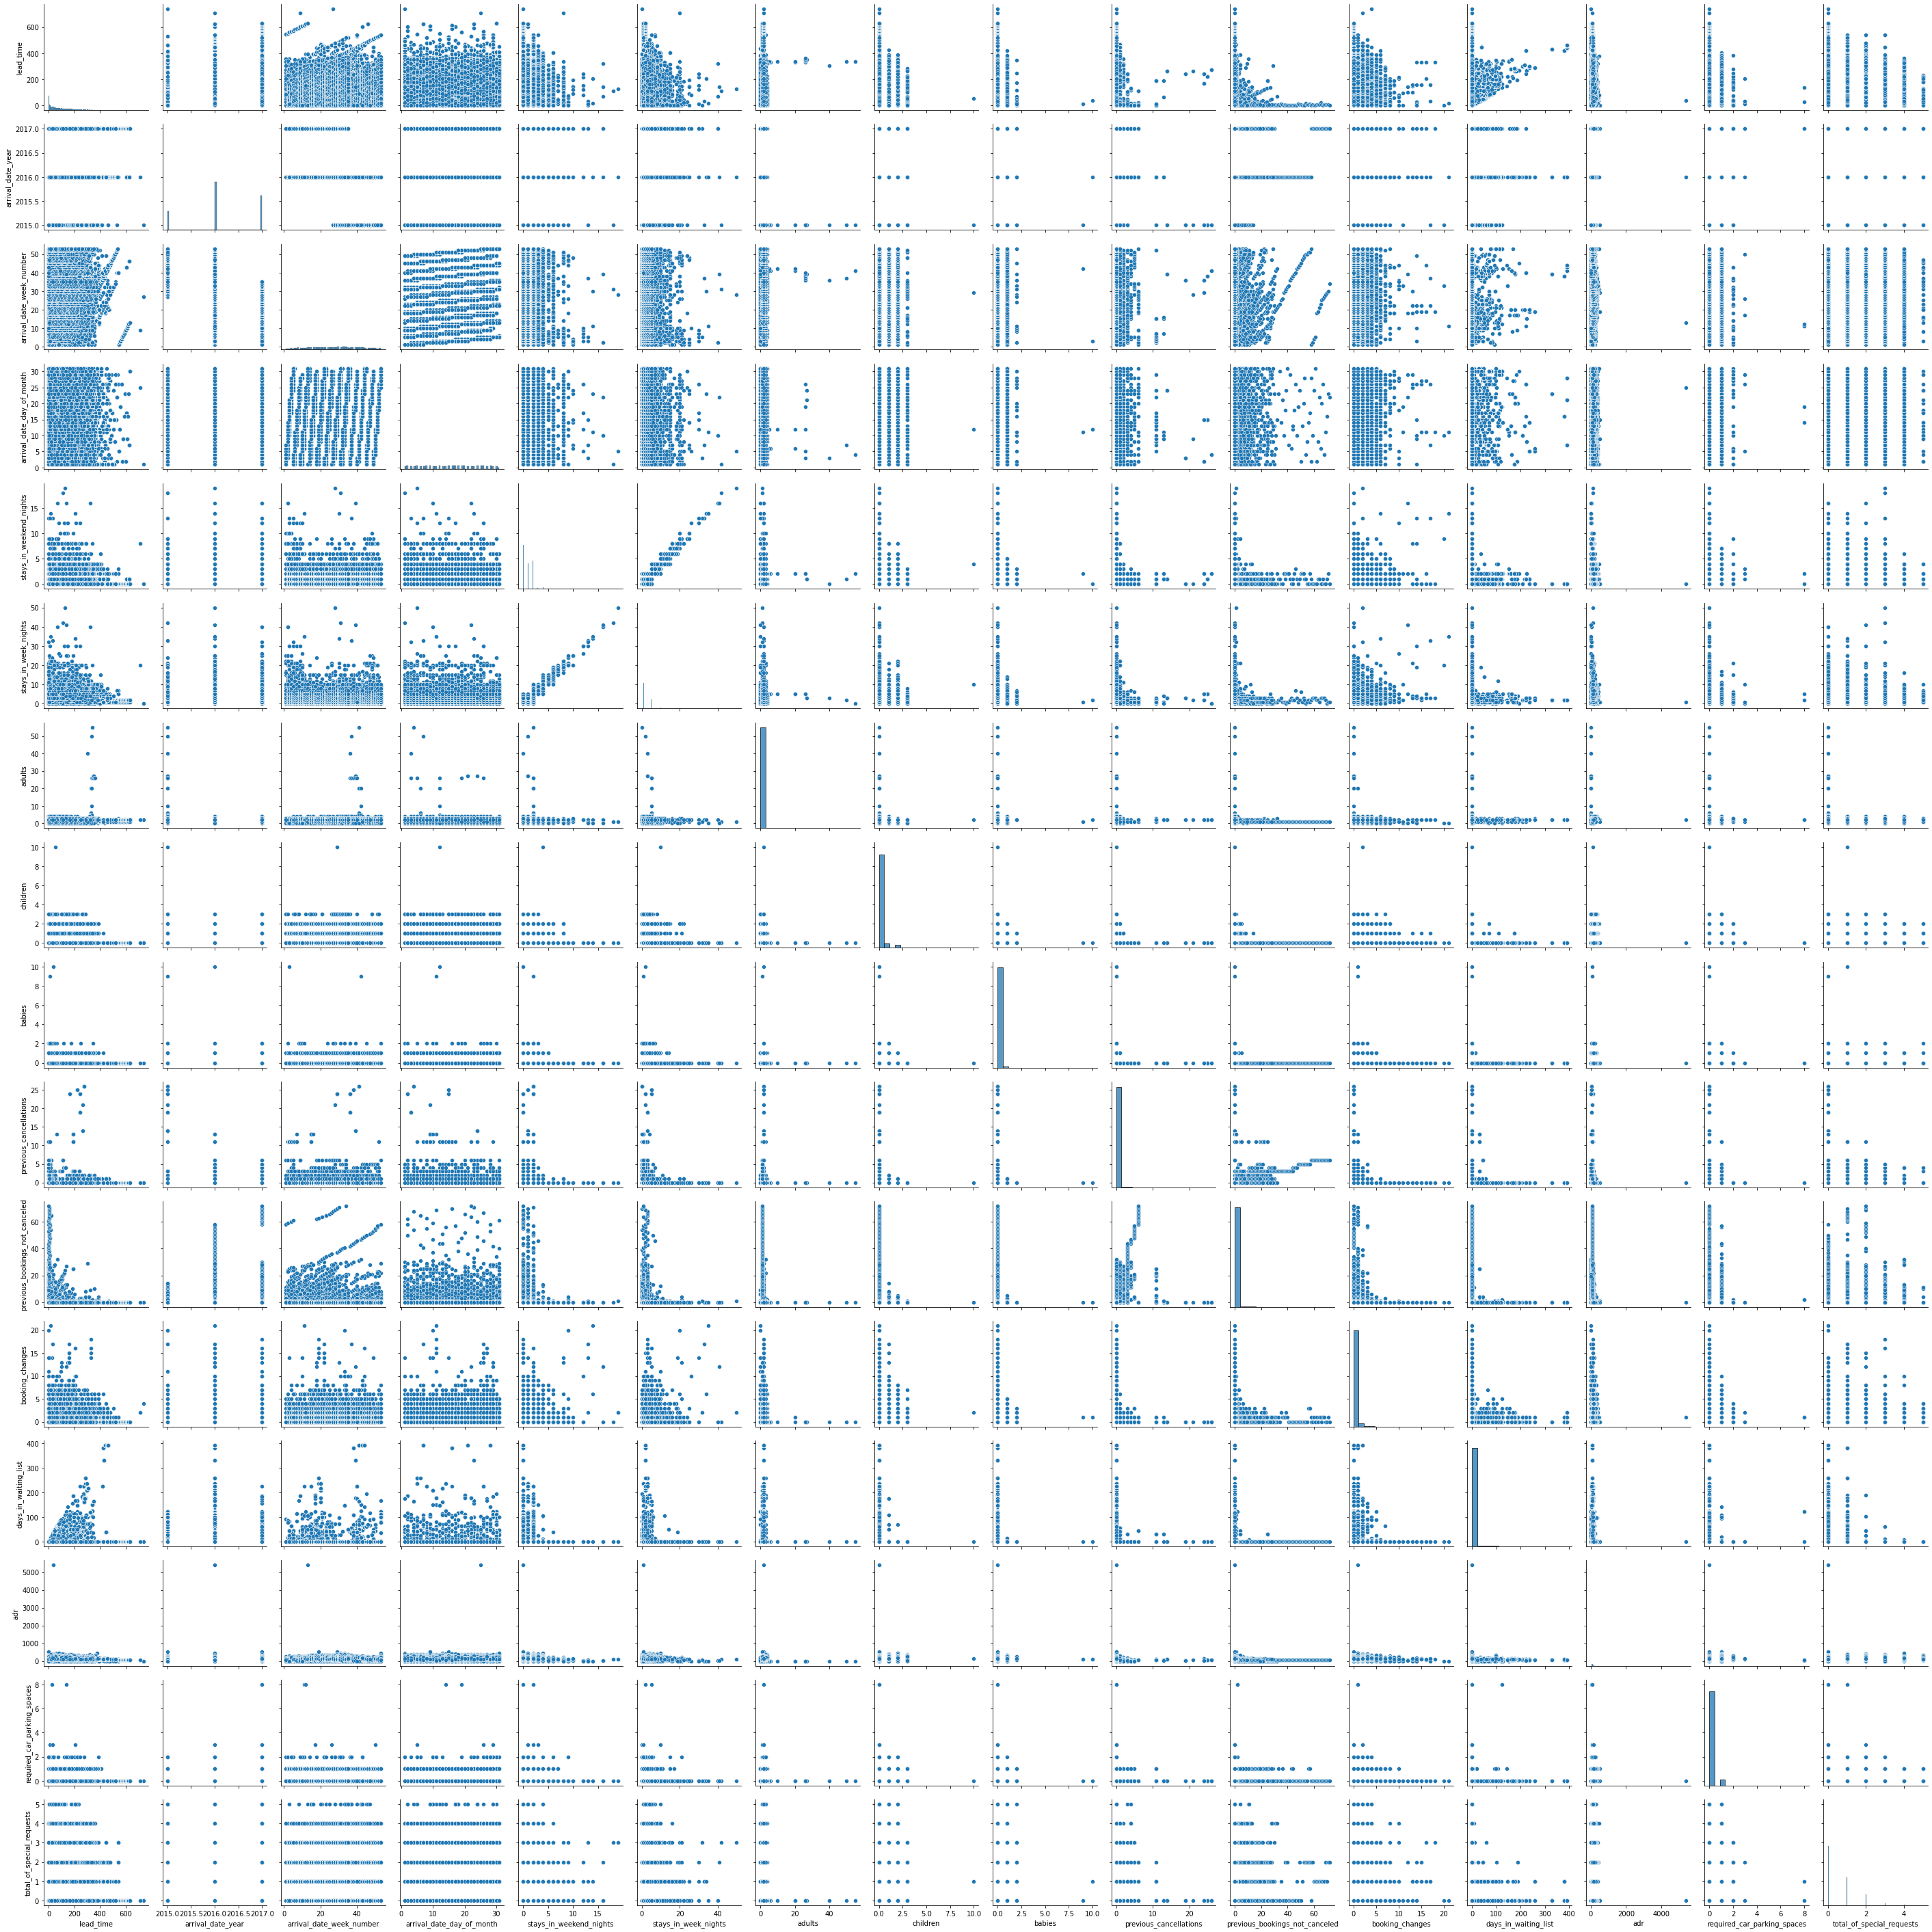

In [9]:
import seaborn as sns

_ = sns.pairplot(data[numcols])

As the 'arrival_date_year' represents the year of arrival date from a dataset with hotel bookings between the 1st of July 2015 and 31st of August 2017, we believe it would be better to consider 'arrival_date_year' as a categorical variables with values [2015, 2016, 2017].

In [10]:
catcols.append('arrival_date_year')
numcols.remove('arrival_date_year')

lead_time


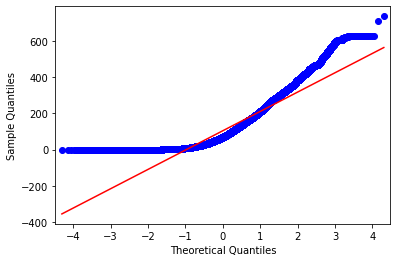

arrival_date_week_number


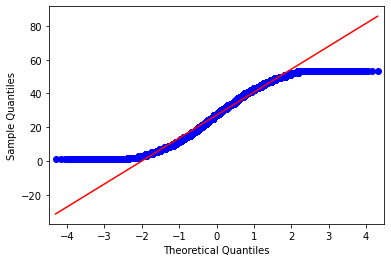

arrival_date_day_of_month


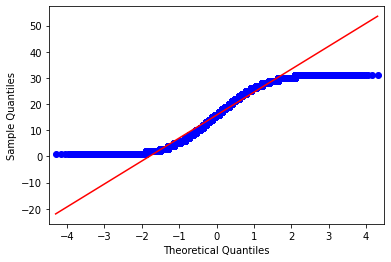

stays_in_weekend_nights


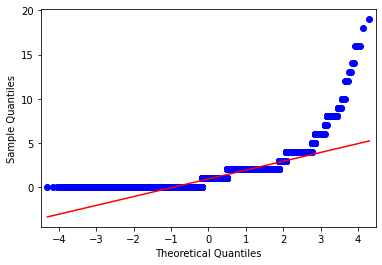

stays_in_week_nights


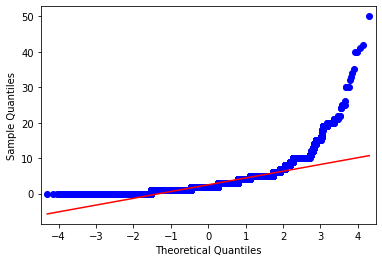

adults


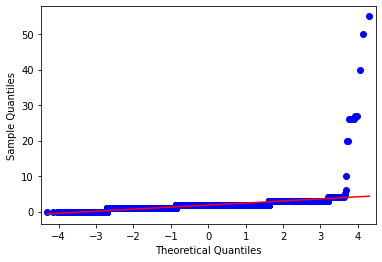

children


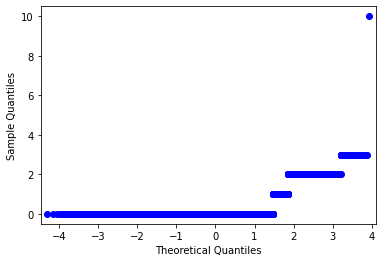

babies


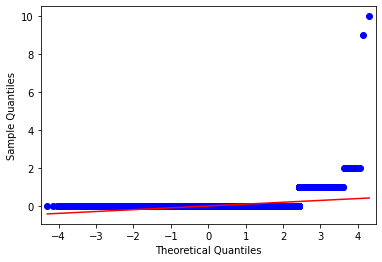

previous_cancellations


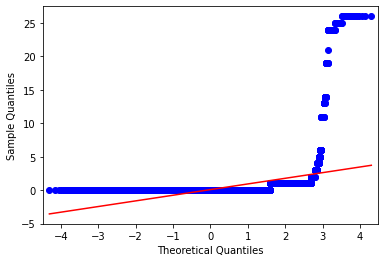

previous_bookings_not_canceled


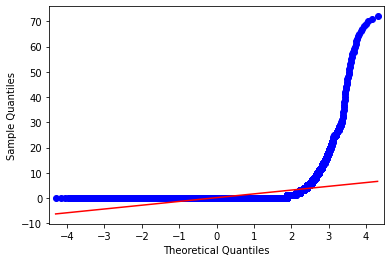

booking_changes


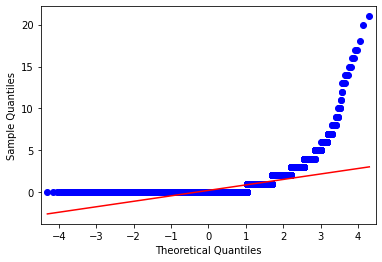

days_in_waiting_list


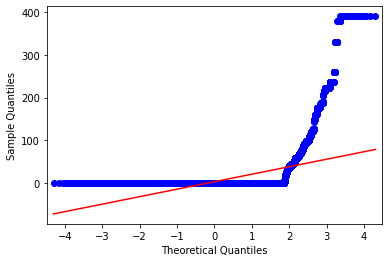

adr


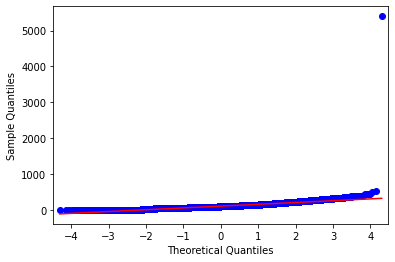

required_car_parking_spaces


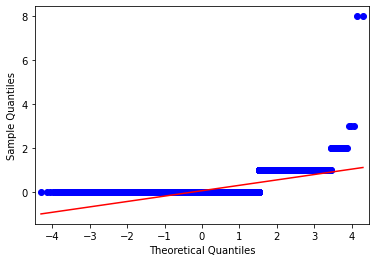

total_of_special_requests


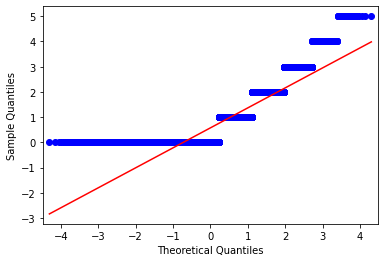

In [11]:
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

for col in data[numcols].columns:
  print(col)
  qqplot(data[col], line='s')
  plt.show()

Now, we will look the the distribution of categorical variables.

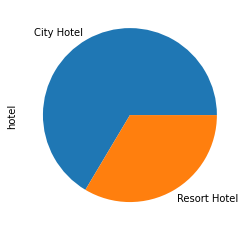

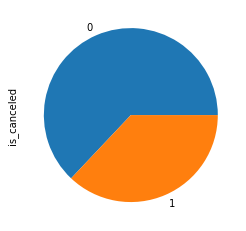

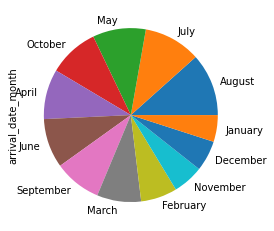

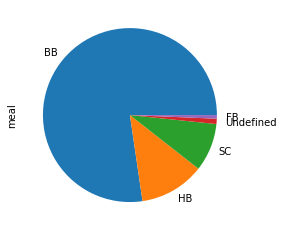

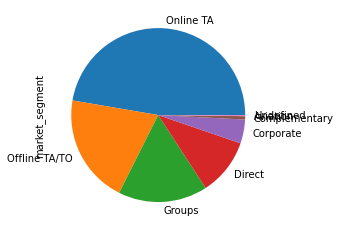

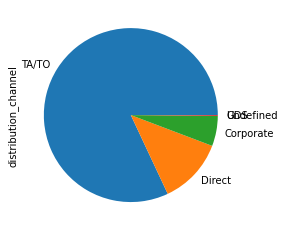

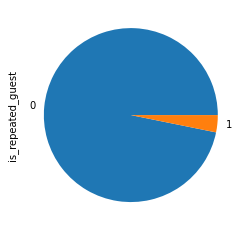

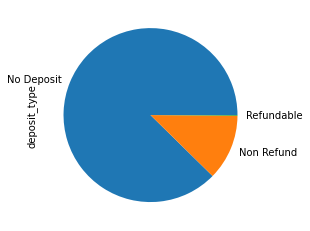

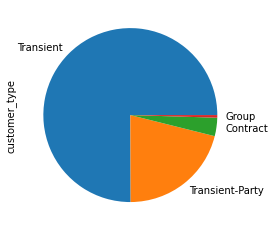

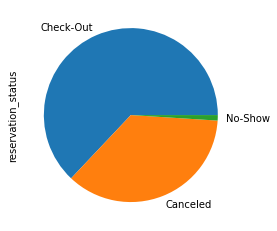

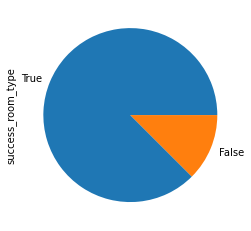

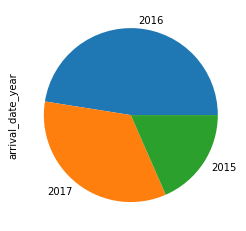

In [12]:
for col in data[catcols].columns:
  data[col].value_counts().plot.pie()
  plt.show()

Now, we will look at any column with NaN values.

In [13]:
nan_cols = data.loc[:, data.isnull().any(axis=0)]
print(nan_cols)

        children
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
119385       0.0
119386       0.0
119387       0.0
119388       0.0
119389       0.0

[119390 rows x 1 columns]


For missing 'children' value, we decided it would be adequate to replace with 0, as it is the most common value.

In [14]:
data.fillna({'children':0}, inplace = True)